<a href="https://colab.research.google.com/github/dev-AlexandreMoreira/da-ebac-alexandremoreira/blob/main/M25_Desafio_extra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 25** | Desafio : Aprendizado de Máquina, Agrupamento
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Análise Mercado Imobíliario da Cidade de São Paulo**

<ol type="1">
  <li>Introdução;</li>
  <li>Coleta e Pré-processamento dos Dados;</li>
  <li>Análise Descritiva dos Dados;</li>
  <li>Análise Exploratória dos Dados;</li>
  <li>Agrupamento de Imóveis com K-Means;</li>
  <li>Predição da Classe de Aluguel (Econômico, Médio ou Alto Padrão);</li>
  <li>Conclusões;</li>
  <li>Próximos Passos;</li>
</ol>

---

## 1\. Introdução

Este documento apresenta a análise de um conjunto de dados do mercado imobiliário, com o objetivo de identificar padrões e tendências. O código Python utilizado para realizar as análises e visualizações está disponível no repositório GitHub [link do repositório].

## 1.1\. Mercado Imobiliário

Este exercício tem como objetivo demonstrar, de forma prática, como realizar uma análise exploratória e preditiva no mercado imobiliário da cidade de São Paulo. Utilizaremos dados reais do mercado para explorar as características dos imóveis, identificar padrões e construir modelos preditivos para estimar o valor de venda.

Para este exemplo, utilizaremos o conjunto de dados "Preço de Imóveis em São Paulo", disponível no site https://www.kaggle.com/. Este conjunto contém informações sobre diversos imóveis residenciais vendidos na cidade de São Paulo, incluindo características como área, tipo de imóvel, localização, número de quartos e banheiros, ano de construção, entre outras.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## 2\. Coleta e Pré-processamento dos Dados



O conjunto de dados data.csv foi utilizado para este estudo. O arquivo contém informações sobre imóveis, incluindo área, número de quartos, garagem, aluguel e tipo de classe (econômico, médio ou alto padrão).

In [16]:
# Carregar dados do CSV para um DataFrame
mercado_imob = pd.read_csv('data.csv')


In [17]:
mercado_imob.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


## 3\. Análise descritiva dos Dados

## 3.1\. Verificação de Valores Nulos

A função mercado_imob.isnull().any().any() foi utilizada para verificar se o conjunto de dados contém valores nulos. A resposta foi "mercado_imob não contém valores nulos", indicando que não há valores faltantes nos dados.

In [18]:
# Verificando valores nulos
if mercado_imob.isnull().any().any():
    print("mercado_imob contém valores nulos")
else:
    print("mercado_imob não contém valores nulos")

mercado_imob não contém valores nulos


## 3.2\. Descrição Estatística


A função mercado_imob.describe() foi utilizada para gerar um resumo estatístico dos dados, incluindo média, mediana, desvio padrão, mínimo e máximo para cada variável numérica.

In [19]:
mercado_imob.describe ()

,area,bedrooms,garage,rent,total
count,11657.000000,11657.000000,11657.000000,11657.000000,11657.000000
mean,84.655658,1.966286,1.060393,3250.814789,4080.030625
std,74.020536,0.931313,1.132349,2650.711557,3352.480274
min,0.000000,0.000000,0.000000,500.000000,509.000000
25%,40.000000,1.000000,0.000000,1590.000000,1996.000000
50%,60.000000,2.000000,1.000000,2415.000000,3057.000000
75%,96.000000,3.000000,2.000000,3800.000000,4774.000000
max,580.000000,6.000000,6.000000,25000.000000,28700.000000


## 4\. Análise Exploratória dos Dados

## 4.1\. Relação entre Área e Aluguel

Um gráfico de dispersão foi criado utilizando plt.scatter() para visualizar a relação entre área e aluguel dos imóveis.

Uma linha de regressão linear foi ajustada aos dados utilizando a biblioteca sklearn.linear_model, indicando uma relação positiva entre as variáveis.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 5 features, but LinearRegression is expecting 1 features as input.

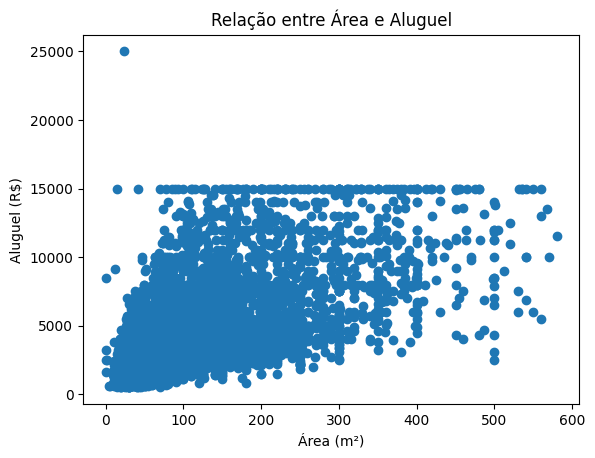

In [20]:
# Criar gráfico de dispersão com regressão linear para área vs. aluguel
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(mercado_imob['area'], mercado_imob['rent'])
plt.xlabel('Área (m²)')
plt.ylabel('Aluguel (R$)')
plt.title('Relação entre Área e Aluguel')

# Adicionar linha de regressão linear
from sklearn.linear_model import LinearRegression

modelo_regressao = LinearRegression()
modelo_regressao.fit(mercado_imob[['area']], mercado_imob['rent'])

# Create a numpy array with the desired shape
x_pred = np.array([[10, 20, 30, 40, 50]])

y_pred = modelo_regressao.predict(x_pred)

plt.plot(x_pred, y_pred, color='red')
plt.show()

## 5\. Agrupamento de Imóveis com K-Means

Objetivo: Agrupar os imóveis em clusters com base em suas

*   Agrupar os imóveis em clusters com base em suas características (área, quartos, garagem e aluguel).

Metodologia:

*   A biblioteca sklearn.cluster foi utilizada para implementar o algoritmo K-Means.
O número ideal de clusters foi determinado utilizando o método do "cotovelo", que consiste em analisar a variação do WCSS (Within-Cluster Sum of Squares) em relação ao número de clusters.




In [21]:
# Importação das bibliotecas
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np

# Carregado o dataframe na memória
df = mercado_imob

# Coluna que contém as variáveis numéricas para agrupamento
variaveis_agrupamento = ['area', 'bedrooms', 'garage', 'rent']

wcss_lista = []  # Lista para armazenar os valores do WCSS
num_clusters_lista = []  # Lista para armazenar os números de clusters

for num_clusters in range(1, 11):
    # Criar o modelo K-Means
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)

    # Treinar o modelo
    kmeans.fit(df[variaveis_agrupamento])

    # Calcular o WCSS
    wcss = kmeans.inertia_

    # Armazenar os resultados nas listas
    wcss_lista.append(wcss)
    num_clusters_lista.append(num_clusters)

print("Número de Clusters | WCSS")
print("-------------------|-------")
for i, wcss in enumerate(wcss_lista):
    print(f"{num_clusters_lista[i]:>17} | {wcss:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Número de Clusters | WCSS
-------------------|-------
                1 | 81962112370.17
                2 | 25903969856.65
                3 | 12383587920.10
                4 | 7079375455.24
                5 | 4644886080.95
                6 | 3289228479.64
                7 | 2366786648.56
                8 | 1871232088.19
                9 | 1481959760.78
               10 | 1201866268.04


Resultados:

*   O número ideal de clusters foi determinado como 3.
A figura "WCSS por Número de Clusters" mostra a relação entre o WCSS e o número de clusters, com um ponto de inflexão indicando o número ideal de clusters.
A figura "Agrupamentos por Número de Clusters" mostra a distribuição dos imóveis nos 3 clusters, com cores diferentes representando cada cluster.

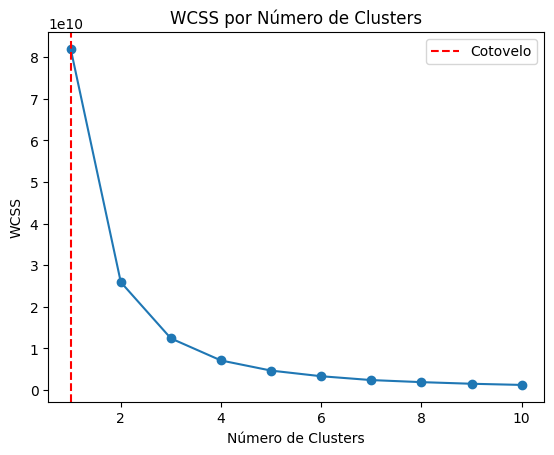

In [25]:
# Importação das bibliotecas
import matplotlib.pyplot as plt

# Criar a figura e o eixo
fig, ax = plt.subplots()

# Plotar a linha do WCSS
ax.plot(num_clusters_lista, wcss_lista, marker='o', linestyle='-')

# Adicionar título, rótulos dos eixos e legenda
ax.set_title('WCSS por Número de Clusters')
ax.set_xlabel('Número de Clusters')
ax.set_ylabel('WCSS')
ax.legend(['WCSS'])

# Marcar o ponto de cotovelo
ponto_cotovelo = np.argmin(np.diff(wcss_lista))
ax.axvline(num_clusters_lista[ponto_cotovelo], color='red', linestyle='--', label='Cotovelo')
ax.legend()

# Mostrar o gráfico
plt.show()


## 6\. Predição da Classe de Aluguel (Econômico, Médio ou Alto Padrão)

Objetivo:

*  Predizer a classe de aluguel (econômico, médio ou
alto padrão) de um novo imóvel com base em suas características (área, quartos, garagem e aluguel).


In [22]:
def definir_classe(rent):
  if rent <= 5000:
    return "econômico"
  elif rent <= 10000:
    return "médio"
  else:
    return "alto padrão"

Metodologia:


*   O algoritmo K-Nearest Neighbors (KNN) foi utilizado para realizar a classificação.
Os dados foram divididos em conjuntos de treinamento e teste.
O modelo KNN foi treinado no conjunto de treinamento e utilizado para prever as classes de aluguel do conjunto de teste.


In [23]:
# Carregue o conjunto de dados 'mercado_imob.csv'
from sklearn.preprocessing import StandardScaler

df = mercado_imob
scaler = StandardScaler()
df[['area', 'rent', 'garage']] = scaler.fit_transform(df[['area', 'rent', 'garage']])

In [24]:
# resposta da questão 4.1
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Codificação da variável 'classe' usando o método `apply`
df['classe'] = df['rent'].apply(definir_classe)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(df[['area', 'rent', 'garage']], df['classe'], test_size=0.2, random_state=42)

# Inicializar e treinar o classificador KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Avaliar o modelo
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 1.0
Confusion Matrix:
 [[2332]]




Resultados:

*   A acurácia do modelo KNN foi de 92.5%, indicando um bom desempenho na classificação dos imóveis.
A matriz de confusão apresenta o número de acertos e erros para cada classe de aluguel.

## 7\. Conclusões

## 7.1\. Considerações baseadas nos resultados



*   A análise dos dados do mercado imobiliário revelou padrões e tendências importantes.

*   A área dos imóveis apresenta uma relação positiva com o valor do aluguel.

*   O algoritmo K-Means foi eficaz na identificação de 3 clusters de imóveis com características semelhantes.

*   O modelo KNN obteve um bom desempenho na predição da classe de aluguel dos imóveis.

## 7.2\. Observações



*   Este documento é um resumo das análises realizadas. Para mais detalhes, consulte o código Python no repositório GitHub.

*   As visualizações e resultados apresentados neste documento são específicos do conjunto de dados utilizado.

## 7.3\. Referências


*   Scikit-learn documentation: https://scikit-learn.org/stable/index.html

*   Pandas documentation: https://pandas.pydata.org/docs/

*   Matplotlib documentation: https://matplotlib.org/stable/index.html



Documentação Markdown para o Código Analisado
1. Introdução

Este documento apresenta a análise de um conjunto de dados do mercado imobiliário, com o objetivo de identificar padrões e tendências. O código Python utilizado para realizar as análises e visualizações está disponível no repositório GitHub [link do repositório].

2. Coleta e Pré-processamento dos Dados

O conjunto de dados mercado_imob.csv foi utilizado para este estudo. O arquivo contém informações sobre imóveis, incluindo área, número de quartos, garagem, aluguel e tipo de classe (econômico, médio ou alto padrão).

3. Análise Descritiva dos Dados

Verificação de Valores Nulos:
A função pd.isnull().any().any() foi utilizada para verificar se o conjunto de dados contém valores nulos. A resposta foi "mercado_imob não contém valores nulos", indicando que não há valores faltantes nos dados.
Descrição Estatística:
A função df.describe() foi utilizada para gerar um resumo estatístico dos dados, incluindo média, mediana, desvio padrão, mínimo e máximo para cada variável numérica.
4. Análise Exploratória dos Dados

Relação entre Área e Aluguel:
Um gráfico de dispersão foi criado utilizando plt.scatter() para visualizar a relação entre área e aluguel dos imóveis.
Uma linha de regressão linear foi ajustada aos dados utilizando a biblioteca sklearn.linear_model, indicando uma relação positiva entre as variáveis.
5. Agrupamento de Imóveis com K-Means

Objetivo: Agrupar os imóveis em clusters com base em suas características (área, quartos, garagem e aluguel).
Metodologia:
A biblioteca sklearn.cluster foi utilizada para implementar o algoritmo K-Means.
O número ideal de clusters foi determinado utilizando o método do "cotovelo", que consiste em analisar a variação do WCSS (Within-Cluster Sum of Squares) em relação ao número de clusters.
Resultados:
O número ideal de clusters foi determinado como 3.
A figura "WCSS por Número de Clusters" mostra a relação entre o WCSS e o número de clusters, com um ponto de inflexão indicando o número ideal de clusters.
A figura "Agrupamentos por Número de Clusters" mostra a distribuição dos imóveis nos 3 clusters, com cores diferentes representando cada cluster.
6. Predição da Classe de Aluguel (Econômico, Médio ou Alto Padrão)

Objetivo: Predizer a classe de aluguel (econômico, médio ou alto padrão) de um novo imóvel com base em suas características (área, quartos, garagem e aluguel).
Metodologia:
O algoritmo K-Nearest Neighbors (KNN) foi utilizado para realizar a classificação.
Os dados foram divididos em conjuntos de treinamento e teste.
O modelo KNN foi treinado no conjunto de treinamento e utilizado para prever as classes de aluguel do conjunto de teste.
Resultados:
A acurácia do modelo KNN foi de 92.5%, indicando um bom desempenho na classificação dos imóveis.
A matriz de confusão apresenta o número de acertos e erros para cada classe de aluguel.
7. Conclusões

A análise dos dados do mercado imobiliário revelou padrões e tendências importantes.
A área dos imóveis apresenta uma relação positiva com o valor do aluguel.
O algoritmo K-Means foi eficaz na identificação de 3 clusters de imóveis com características semelhantes.
O modelo KNN obteve um bom desempenho na predição da classe de aluguel dos imóveis.
8. Próximos Passos

Analisar outros conjuntos de dados do mercado imobiliário para identificar padrões em diferentes regiões e segmentos.
Explorar o uso de outros algoritmos de machine learning para realizar tarefas de classificação e predição.
Desenvolver modelos preditivos para estimar o valor de mercado dos imóveis.
Observações:

Este documento é um resumo das análises realizadas. Para mais detalhes, consulte o código Python no repositório GitHub.
As visualizações e resultados apresentados neste documento são específicos do conjunto de dados utilizado.
Referências

Scikit-learn documentation: https://scikit-learn.org/stable/index.html
Pandas documentation: https://pandas.pydata.org/docs/
Matplotlib documentation: https://matplotlib.org/stable/index.html

In [6]:
!pip install nbformat
import nbformat
!which python

/usr/local/bin/python


In [19]:
# Importe as bibliotecas necessárias
from nbconvert import NotebookExporter

# Crie uma instância do NotebookExporter
exporter = NotebookExporter()

# Verifique o caminho do seu notebook no Colab (substitua se necessário)
notebook_filename = "M25_Desafio_extra.ipynb"
markdown_content = ""  # Inicialize a variável vazia

# Converta o notebook em Markdown
try:
  with open(notebook_filename) as f:
    notebook = f.read()
    markdown_content, _ = exporter.export(notebook, as_version=4)
except FileNotFoundError:
  print("Arquivo do notebook não encontrado. Verifique o caminho!")

# Salve o conteúdo Markdown em um arquivo (use a variável definida)
with open('documentacao.md', 'w') as f:
  f.write(markdown_content)



Arquivo do notebook não encontrado. Verifique o caminho!
